In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing(as_frame=True)

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
df = housing.frame

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(housing.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [9]:
dataset = pd.DataFrame(housing.data)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dataset["Price"] = housing.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
# EDA
# Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [15]:
import seaborn as sns

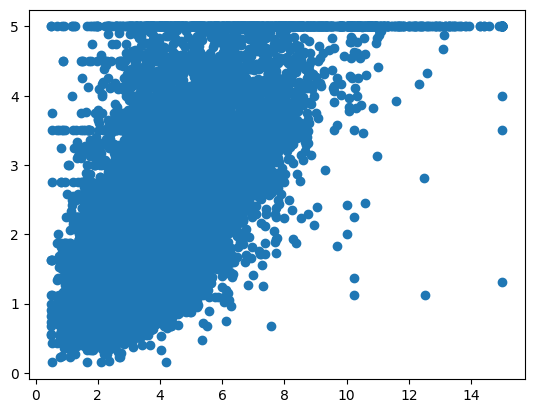

In [16]:
plt.scatter('MedInc' , 'Price', data = dataset)

<Axes: xlabel='MedInc', ylabel='Price'>

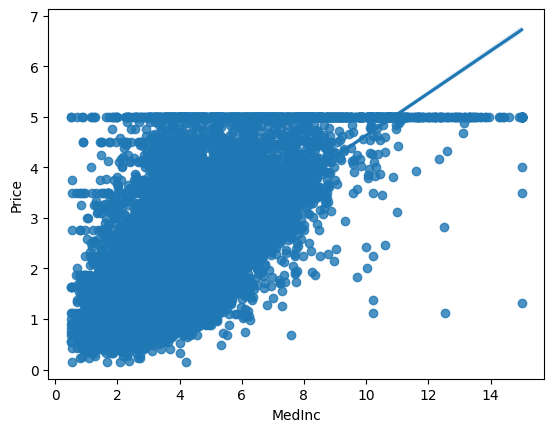

In [17]:
sns.regplot(x='MedInc' , y='Price', data = dataset)

In [18]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [19]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
#Train test split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
print(x_train)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7061   4.1312      35.0  5.882353   0.975490      1218.0  2.985294     33.93   
14689  2.8631      20.0  4.401210   1.076613       999.0  2.014113     32.79   
17323  4.2026      24.0  5.617544   0.989474       731.0  2.564912     34.59   
10056  3.1094      14.0  5.869565   1.094203       302.0  2.188406     39.26   
15750  3.3068      52.0  4.801205   1.066265      1526.0  2.298193     37.77   
...       ...       ...       ...        ...         ...       ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Longitude  
7061     -118.02  
1

In [23]:
#Standardlize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

In [26]:
# Model Training
from sklearn.linear_model import LinearRegression

In [27]:
regression = LinearRegression()

In [29]:
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [31]:
reg_pred = regression.predict(x_test)

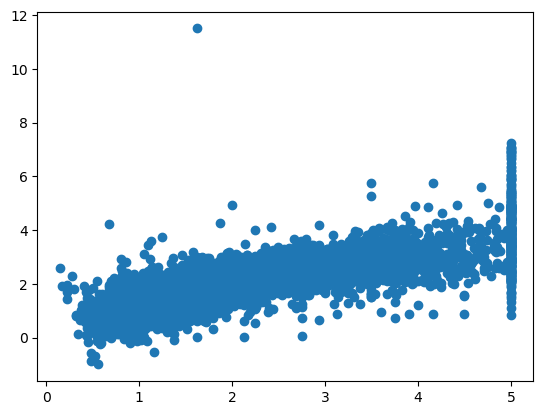

In [32]:
plt.scatter(y_test, reg_pred)

In [33]:
residuals = y_test-reg_pred

In [34]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

C:\Users\Jirtus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


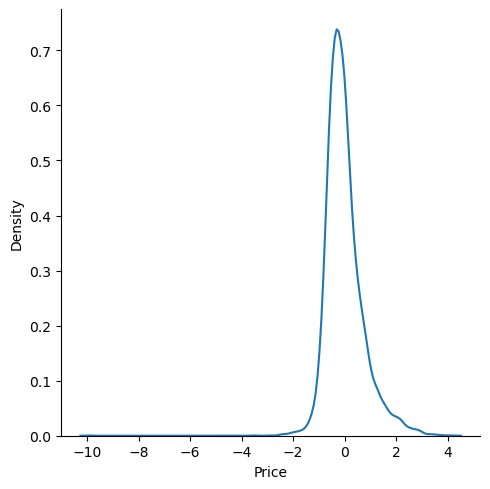

In [35]:
sns.displot(residuals, kind="kde")

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5305677824766752
0.5272474538305955
0.7284008391515452


In [37]:
# R square and adjusted R square

In [38]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5957702326061664


In [39]:
# Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5952472117200025

In [40]:
# New data prediction

In [43]:
housing.data.iloc[0].values.reshape(1, -1)


array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [46]:
scaler.transform(housing.data.iloc[0].values.reshape(1, -1))

C:\Users\Jirtus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

# Pickling the model for deployment


In [45]:
import pickle
pickle.dump(regression, open('regmodel.pkl','wb'))

In [47]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [48]:
pickled_model.predict(scaler.transform(housing.data.iloc[0].values.reshape(1, -1)))

C:\Users\Jirtus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])